<a href="https://colab.research.google.com/github/hermannkakapeu/ML/blob/main/Projet_Stage_ESITH_Textile.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## IMPORTATION DES LIBRAIRIES
on commence par importer tpoutes les bibliotheques python qui serviront
à mener à bien le projet.

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.model_selection import train_test_split

### IMPORTATION DE LA DATA
Pour cela nous avons trois méthodes majeures:

* Soit on utilise la fonction upload() pour televerser les fichiers 
* soit on les charge directement dans l'estce de stockage de la session à gauche
* soit on met la data sur notre drive et on le charge via drive.mount()


In [ ]:
#Grace à cette commande facile de Google Colab on importe notre fichier texte
#depuis notre PC sur le note book, il est aussi possible de le faire via le Drive


from google.colab import files
#from google.colab import drive/files
files.upload()
#drive.mount('content\gdrive')

In [ ]:
#data = text_to_pandas('/content/2022-05-26_08-48-25_absorbance.txt', 1)

cart1 = '/content/carton1.txt'
cart2 = '/content/carton2.txt'
montelp = '/content/montel.txt'
reff = '/content/ref.txt' 

carton1 = text_to_pandas(cart1, 'carton 1')
carton2 = text_to_pandas(cart2, 'carton 2')
montel = text_to_pandas(montelp, 'mon telephone')
ref = text_to_pandas(reff, 'la reference')


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  app.launch_new_instance()


In [ ]:
carton1

In [ ]:
#stack.iloc[1:2,:-1].loc[1]

0.248098508

## LES FONCTIONS UTILES

In [ ]:
# je dois enlever les deux premières lignes(mesures) et les lignes contenant des NaN
#dans le DatFrame car elles sont nulles dans tous les datas.

def text_to_pandas(path, etiquette):
  """
  Ctette fonction prend en entrée le chemin du fichier 
  texte contenant les donnee recueillies par SensorControl
  et les retourne sous forme de table Pandas en ajoutant une colonne 
  specifiant le type de tissu. 
  """
  path_text = path
  et = etiquette
  df = pd.read_csv(path_text, sep='\t', header=1)
  del(df['Time'])
  del(df['Date'])
  df = df.drop([0,1], 0)
  df = num(df)
  df = df.assign(type_tissu=et)
  #col = df.columns[0]
  #df.drop(df.loc[df[col] == 'NaN'])
  return df




In [ ]:
def stack_data(data1, data2):
  """
  cette fonction prend en entrée deux DataFrames Pandas et renvoie une seule Table
  qui est la superposition verticale de ces deux dernières.
  """
  data = pd.concat([data1, data2], join = 'inner', ignore_index = True)
  return data


# http://www.python-simple.com/python-pandas/concatenations-joins-dataframe.php
# ce site est très utile pour les concatenations de DataFrame pa,das.

In [ ]:
#je pourai ameliorer cette fonction au fur et a mesure que j'aurai d'autres idées
# J'ai aussi a l'idee de mettre toutes ces fonction dans une classe et faciliter l'interaction entre elles

def les_infos(data):
  """
  Cette fonction prend en entrée un DataFrame pandas et renvoie
  des informations specifiques et utiles à notre études sur le datset. 
  """
  a1 = data.columns[1]
  b1 = a1.replace(',', '.')
  c1 = float(b1)
  a2 = data.columns[2]
  b2 = a2.replace(',', '.')
  c2 = float(b2)
  pas = c2 - c1

  first = float(data.columns[0].replace(',', '.'))
  last = float(data.columns[-2].replace(',', '.'))

  numMesure = data.shape[0]
  numWL = data.shape[1]-1



  print('************INFOS SUR CE DATA**************')
  print('')
  print('')
  print(f"plage de longueur d'onde : [{first} - {last}]\nPas d'incrementation : {pas}\nNombre de Mesures : {numMesure}\nNombre de longueurs d'onde : {numWL}")
  



In [ ]:
def list_plage(data):
  """
  Cette fonction prend en entree un DataFrame pandas contenant les donnees
  et renvoie la liste des longueurs d'onde dans une liste en format float
  ca peut etre utile si on veut trcaer des courbes
  """
  liste = []
  col = []
  for i in data.columns :
    col.append(i)
  for i in col :
    if (col.index(i) != len(col)-1) :
      x = float(i.replace(',', '.'))
      liste.append(x)

  
  return liste



def list_mesure(data, numLigne):
  """
  Cette fonction prend en entrée un dataFrame pandas et le numéro d'une ligne 
  qu'elle renvoie sous forme de liste.
  c'est comme si on renvoie une mésure parmi les autres mesures. Elle sera utile pour des traces de courbes
  mais aussi pour faciliter les predictions. 
  """
  liste = []
  liste1 = []
  #iter = data.iloc[numLigne:numLigne+1,:-1].loc[0]
  iter = data.loc[numLigne]
  for i in iter :
    liste.append(i)
  L = liste[:-1]

  return L



def list_mesure1(data, numLigne):
  """
  Cette fonction prend en entrée un dataFrame pandas et le numéro d'une ligne 
  qu'elle renvoie sous forme de liste.
  c'est comme si on renvoie une mésure parmi les autres mesures. Elle sera utile pour des traces de courbes
  mais aussi pour faciliter les predictions. 
  """
  liste = []
  liste1 = []
  iter = data.loc[numLigne]
  for i in iter :
    liste.append(i)
  L = liste
  #for i in L :
      #x = float(i.replace(',', '.'))
      #liste1.append(x)
  return L

In [ ]:
def plot_mesure(data, numLigne):
  """
  Cette fonction prend en entree le DataFrame avec le numéro de ligne de la mésure et renvoie en sortie
  le tracé de la mesure en fonction de la plage de longueur d'onde définie.
  """
  import matplotlib.pyplot as plt

  plage = list_plage(data)
  mesure = list_mesure(data, numLigne)

  plt.axes()
  plot = plt.plot(plage, mesure)
  #plt.plot(plage, mesure)
  plt.xlim([1550, 1900])
  plt.ylim([min(mesure), max(mesure)])
  plt.yticks(np.arange(min(mesure), max(mesure), 0.01))
  plt.xticks(np.arange(1550, 1900, 10))
  plt.show()
  return plot

#plage = list_plage(montel)
#mesure7 = list_mesure(carton2, 5)

#plt.plot(plage, mesure7)

def plot_list(data, listMesure):
  """
  Cette fonction prend en entree le DataFrame avec le numéro de ligne de la mésure et renvoie en sortie
  le tracé de la mesure en fonction de la plage de longueur d'onde définie.
  """
  import matplotlib.pyplot as plt
  
  plage = list_plage(data)
  #mesure = list_mesure(data, numLigne)

  plt.axes()
  #plot = plt.plot(plage, mesure)
  for i in listMesure :
    plt.subplot()
    mesure = list_mesure(data, i)
    plt.plot(plage, mesure)
    plt.xlim([1550, 1900])
    plt.ylim([min(mesure), max(mesure)])
    plt.yticks(np.arange(min(mesure), max(mesure), 0.01))
    plt.xticks(np.arange(1550, 1900, 30))
    plt.grid(True)
    plt.show()
  #return plot


In [ ]:
def numeric_X(X):
  """
  le but de cette fonction est de prendre en entrée les variables X et de retourner
  les valeurs de ce dataframe en numerique. car ils sont en format str au depart.
  """
  liste4 = X.columns
  liste2 = []
  for i in range(X.shape[0]) :
    liste2.append(list_mesure1(X, i))
  X_num = pd.DataFrame(liste2, columns=liste4)

  return X_num

def num(df):
  a = df.apply(lambda x: x.str.replace(',','.'))
  return a.astype(float)





In [ ]:
m = [[1], [3, 6]]
#max(max(m))

## TESTS DES FONCTIONS

In [ ]:
#stackTest = stack_data(data, data)
#stackTest
listedata = [carton2, montel, ref]
stack = carton1
for i in range(3):
  stack = stack_data(stack, listedata[i])
stack

In [ ]:
stack.shape

In [ ]:
les_infos(stack) 

************INFOS SUR CE DATA**************


plage de longueur d'onde : [1550.0 - 1900.0]
Pas d'incrementation : 10.0
Nombre de Mesures : 20
Nombre de longueurs d'onde : 36


In [ ]:
#TEST : affichage des spectres des differents echantillons
fig = plt.figure(1)
for k in range():
  
plage = list_plage(montel)
mesure7 = list_mesure(carton2, 5)
plt.axes()
plt.plot(plage, mesure7)
plt.xlim([1550, 1900])
plt.ylim([0, 0.5])
plt.yticks(np.arange(0, 0.5, 0.01))
plt.xticks(np.arange(1550, 1900, 10))
plt.show()

#Test reusssi !

In [ ]:
for i in range(20):
  plot_mesure(stack, i)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:39: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


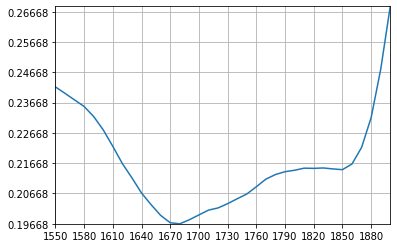

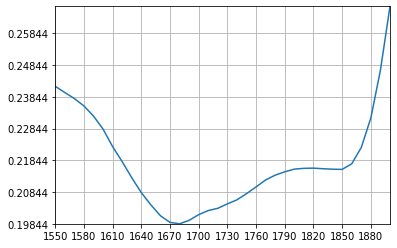

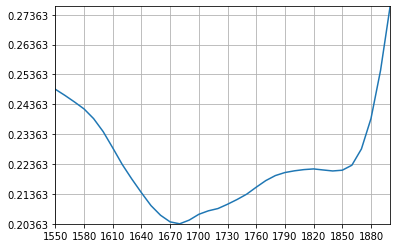

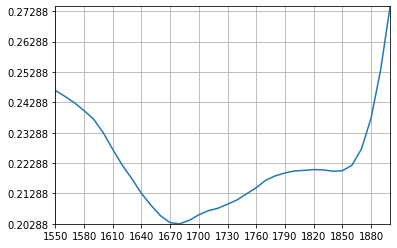

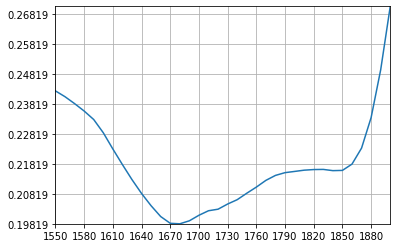

In [ ]:
l = [ i for i in range(5, 10)]
plot_list(stack, l)

In [ ]:
#CARTON1

for i in range(5):
  plot_mesure(stack, i)

In [ ]:
#CARTON 2

for i in range(5, 10):
  plot_mesure(stack, i)

In [ ]:
# MON TELEPHONE

for i in range(10, 15):
  plot_mesure(stack, i)

In [ ]:
# REFERENCE

for i in range(15, 20):
  plot_mesure(stack, i)

In [ ]:
h = [1, 2, 3, 4]
max(h)

4

## MODELES ML et DL

In [ ]:

def split_data(stack, pourcentage) :
  """
  cette fonction prend en entree toute notre data et la portion pour le test et
  le divise en deux parties pour ensuite renvoyer le X_train, X_test, y_train et y_test
  """
  X = stack.iloc[:,:-1]
  Y = stack.iloc[:,-1:]
  
  X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=pourcentage)
  #X_train = num(X_train)
  #X_test = num(X_test)

  return X_train, X_test, y_train, y_test



In [ ]:
from sklearn.preprocessing import MinMaxScaler

X_train, X_test, y_train, y_test = split_data(stack, 0.2)
x_norm = MinMaxScaler()
a = pd.DataFrame(x_norm.fit_transform(X_train))


#X = stack.iloc[:,:-1]
#X = num(X)
#X_train = num(X_train)
#X_test = num(X_test)


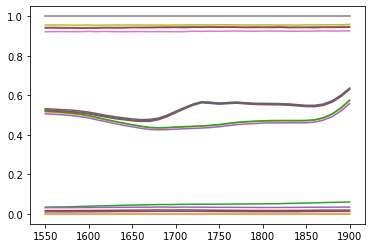

In [ ]:
b = list_plage(carton1)
for i in range(a.shape[0]):
  plt.plot(b, a.loc[i])

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder

code = LabelEncoder()
code.fit(y_train)
code1 = code.transform(y_train)

model = KNeighborsClassifier()
model.fit(X_train, code1)

from sklearn.linear_model import LinearRegression
model1 = LinearRegression()
model1.fit(X_train, code1)



/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LinearRegression()

In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

model2 = make_pipeline(StandardScaler(),
                    SGDClassifier(max_iter=1000, tol=1e-3))
model2.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdclassifier', SGDClassifier())])

In [ ]:
print(model2.predict(X_test))
print(model2.score(X_train, y_train))
print(X_test)

['mon telephone' 'mon telephone' 'carton 2' 'mon telephone']
0.8125
    1550,0000  1560,0000  1570,0000  1580,0000  1590,0000  1600,0000  \
13   0.465698   0.464589   0.463493   0.462087   0.461109   0.460020   
4    0.254849   0.252580   0.250845   0.248899   0.246079   0.242291   
6    0.241750   0.239800   0.237901   0.235563   0.232389   0.228278   
0    0.250983   0.249132   0.247390   0.245348   0.242832   0.239229   

    1610,0000  1620,0000  1630,0000  1640,0000  ...  1810,0000  1820,0000  \
13   0.459055   0.458345   0.457929   0.457257  ...   0.460443   0.460188   
4    0.238073   0.233342   0.229076   0.225534  ...   0.262397   0.261849   
6    0.222753   0.218024   0.212974   0.208262  ...   0.215911   0.215971   
0    0.234549   0.230189   0.226151   0.222578  ...   0.261545   0.261039   

    1830,0000  1840,0000  1850,0000  1860,0000  1870,0000  1880,0000  \
13   0.459915   0.459084   0.459923   0.459707   0.460612   0.461959   
4    0.260801   0.258694   0.257083   0.2

In [ ]:
model1.predict(X_test)

array([2.93078932, 0.01866853, 1.12835065, 0.00711707])

In [ ]:
for i in range(X_test.shape[0]) :

  print(model.predict(X_test.iloc[i:i+1,:]))

[1]
[3]
[2]
[0]


In [ ]:
print(model.score(X_train, code1))

1.0


In [ ]:
X_test

,"1550,0000","1560,0000","1570,0000","1580,0000","1590,0000","1600,0000","1610,0000","1620,0000","1630,0000","1640,0000",...,"1810,0000","1820,0000","1830,0000","1840,0000","1850,0000","1860,0000","1870,0000","1880,0000","1890,0000","1900,0000"
8,0.246798,0.244838,0.242701,0.240164,0.237353,0.232915,0.227405,0.222155,0.217735,0.212909,...,0.220466,0.220733,0.220642,0.220195,0.220356,0.222122,0.227502,0.237576,0.253385,0.274468
11,0.459388,0.458678,0.457369,0.456039,0.454967,0.453672,0.453517,0.452852,0.452132,0.451638,...,0.455765,0.456141,0.454861,0.454352,0.454486,0.454927,0.455515,0.456814,0.459637,0.462692
15,0.004623,0.004653,0.004681,0.004671,0.004775,0.004870,0.004681,0.004626,0.004717,0.004643,...,0.004739,0.004774,0.004705,0.004631,0.004840,0.004748,0.004772,0.004670,0.004864,0.004856
2,0.254573,0.252701,0.250857,0.249274,0.246455,0.242884,0.238498,0.233750,0.230086,0.226740,...,0.264334,0.264061,0.262946,0.260820,0.259207,0.259220,0.262885,0.271676,0.287081,0.306606


In [ ]:
a = list_mesure1(X_test, 24)
a = np.array(a)
a = a.reshape((1,-1))
model.predict(a)

In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras import layers

In [ ]:
model = Sequential(
    layers.Dense(2, activation="relu", name="layer1"),
    layers.Dense(3, activation="relu", name="layer2"),
    layers.Dense(2, name="layer3"),
)

TypeError: ignored

In [ ]:
c = [['x', '1.23', '14.2'], 
     ['y', '20', '0.11'],
     ['z', '3', '10']]
df = pd.DataFrame(
    c, 
    columns=['first', 'second', 'third'])
print(df)
df[['second', 'third']] = df[['second', 'third']].astype(float)
print('Converting..................')
print('............................')
df

  first second third
0     x   1.23  14.2
1     y     20  0.11
2     z      3    10
Converting..................
............................


,first,second,third
0,x,1.23,14.20
1,y,20.00,0.11
2,z,3.00,10.00


In [ ]:
df[df.columns[:-1]]

,first,second
0,x,1.23
1,y,20.00
2,z,3.00
